In [0]:
import numpy as np 
import pandas as pd 

In [0]:
x=pd.read_csv("train1.csv")
y=pd.read_csv("train2.csv")
test=pd.read_csv("test_k.csv")



In [0]:
train=pd.concat([x,y])
train.shape

(1587292, 18)

In [0]:
train.isnull().values.any()

False

In [0]:
import seaborn as sns
from pylab import rcParams
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8


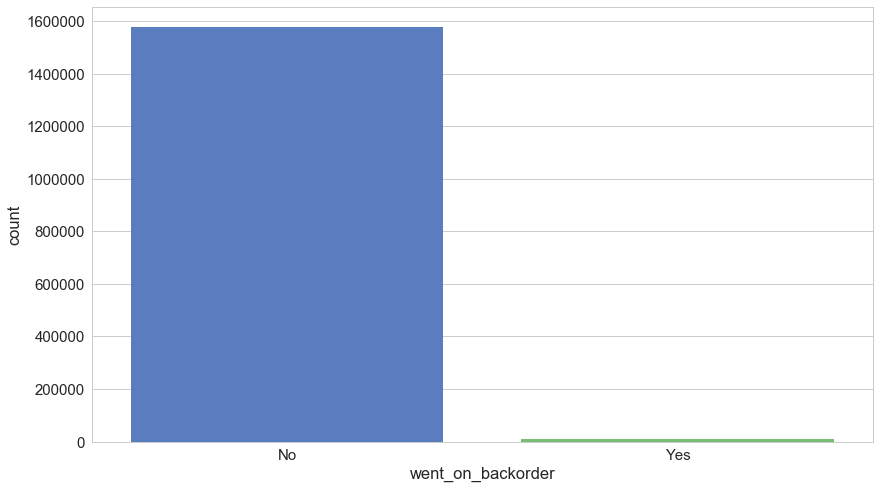

In [0]:

import matplotlib.pyplot as plt
sns.countplot(x='went_on_backorder', data=train)


In [0]:
counts_df = pd.DataFrame(train.groupby('went_on_backorder').size().rename('counts'))
print(counts_df)

                    counts
went_on_backorder         
No                 1575999
Yes                  11293


In [0]:
test.head(5)

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_1_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,-0.015845,0.010931,-0.049796,-0.033019,-0.036963,-0.037467,-0.046246,0,-0.010528,0.151589,0.136445,-0.018855,0,0,0,1,0,No
1,-0.016110,-0.841331,-0.049796,-0.033019,-0.036963,-0.037326,-0.046246,0,-0.010528,0.141472,0.119773,-0.018855,0,0,1,1,0,No
2,-0.016343,0.010931,-0.049796,-0.033019,-0.036963,-0.037467,-0.046246,0,-0.010528,0.124129,0.116438,-0.018855,0,0,0,1,0,No
3,-0.015911,-0.841331,-0.049796,-0.033019,-0.036963,-0.037326,-0.046246,0,-0.010528,0.111844,0.113937,-0.018855,0,0,0,1,0,No
4,-0.009508,1.147279,-0.049796,-0.033019,-0.036963,-0.037467,-0.046246,0,-0.010528,0.132800,0.110603,-0.018855,0,0,0,1,0,No


In [0]:
train.shape

(51293, 18)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
target_names = ['No','Yes']


Tree based feature selection:

In [0]:
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


In [0]:
features = train.iloc[:,0:17]
label = train['went_on_backorder']
clf = ExtraTreesClassifier()
clf = clf.fit(features, label)
model = SelectFromModel(clf, prefit=True)
New_features = model.transform(features)
print(New_features.shape)

(1587292, 5)


L1-based feature selection:

In [0]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, label)
model_2 = SelectFromModel(lsvc, prefit=True)
New_features_2 = model_2.transform(features)
print(New_features_2.shape)

(1587292, 13)


Loading the classifiers.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
Classifiers = [LogisticRegression(C=10),DecisionTreeClassifier(),GaussianNB(),GradientBoostingClassifier(n_estimators=200)]

Without Feature Selection:

In [0]:
from sklearn.metrics import accuracy_score
import timeit
test_features= test.iloc[:,0:17]
Time_1=[]
Model_1=[]
Out_Accuracy_1=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features,label)
    pred=fit.predict(test_features)
    print(clf.__class__.__name__)
    print(classification_report(test['went_on_backorder'],pred,target_names=target_names))
    print(confusion_matrix(test['went_on_backorder'], pred))
    print("\n")
    elapsed = timeit.default_timer() - start_time
    Time_1.append(elapsed)
    Model_1.append(clf.__class__.__name__)
    Out_Accuracy_1.append(accuracy_score(test['went_on_backorder'],pred))

LogisticRegression
             precision    recall  f1-score   support

         No       0.99      1.00      0.99    224748
        Yes       0.00      0.00      0.00      2688

avg / total       0.98      0.99      0.98    227436

[[224746      2]
 [  2688      0]]


DecisionTreeClassifier
             precision    recall  f1-score   support

         No       0.99      0.94      0.96    224748
        Yes       0.03      0.16      0.05      2688

avg / total       0.98      0.93      0.95    227436

[[211608  13140]
 [  2254    434]]


GaussianNB
             precision    recall  f1-score   support

         No       1.00      0.06      0.11    224748
        Yes       0.01      0.98      0.02      2688

avg / total       0.98      0.07      0.11    227436

[[ 13505 211243]
 [    50   2638]]


GradientBoostingClassifier
             precision    recall  f1-score   support

         No       0.99      1.00      0.99    224748
        Yes       0.47      0.03      0.05      2688

avg

L1-based feature selection:

In [0]:
test_features= model_2.transform(test.iloc[:,0:17])
Time_3=[]
Model_3=[]
Out_Accuracy_3=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(New_features_2,label)
    pred=fit.predict(test_features)
    print(clf.__class__.__name__)
    print(classification_report(test['went_on_backorder'],pred,target_names=target_names))
    print(confusion_matrix(test['went_on_backorder'], pred))
    print("\n")
    elapsed = timeit.default_timer() - start_time
    Time_3.append(elapsed)
    Model_3.append(clf.__class__.__name__)
    Out_Accuracy_3.append(accuracy_score(test['went_on_backorder'],pred))

LogisticRegression
             precision    recall  f1-score   support

         No       0.99      1.00      0.99    224748
        Yes       0.00      0.00      0.00      2688

avg / total       0.98      0.99      0.98    227436

[[224745      3]
 [  2688      0]]


DecisionTreeClassifier
             precision    recall  f1-score   support

         No       0.99      0.97      0.98    224748
        Yes       0.05      0.14      0.08      2688

avg / total       0.98      0.96      0.97    227436

[[217925   6823]
 [  2311    377]]


GaussianNB
             precision    recall  f1-score   support

         No       1.00      0.08      0.14    224748
        Yes       0.01      0.98      0.02      2688

avg / total       0.98      0.09      0.14    227436

[[ 17088 207660]
 [    60   2628]]


GradientBoostingClassifier
             precision    recall  f1-score   support

         No       0.99      1.00      0.99    224748
        Yes       0.18      0.04      0.07      2688

avg

Tree-Based feature selection:

In [0]:
test_features= model.transform(test.iloc[:,0:17])
Time_2=[]
Model_2=[]
Out_Accuracy_2=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(New_features,label)
    pred=fit.predict(test_features)
    print(clf.__class__.__name__)
    print(classification_report(test['went_on_backorder'],pred,target_names=target_names))
    print(confusion_matrix(test['went_on_backorder'], pred))
    print("\n")
    elapsed = timeit.default_timer() - start_time
    Time_2.append(elapsed)
    Model_2.append(clf.__class__.__name__)
    Out_Accuracy_2.append(accuracy_score(test['went_on_backorder'],pred))

LogisticRegression
             precision    recall  f1-score   support

         No       0.99      1.00      0.99    224748
        Yes       0.00      0.00      0.00      2688

avg / total       0.98      0.99      0.98    227436

[[224744      4]
 [  2688      0]]


DecisionTreeClassifier
             precision    recall  f1-score   support

         No       0.99      0.63      0.77    224748
        Yes       0.02      0.52      0.03      2688

avg / total       0.98      0.63      0.76    227436

[[142026  82722]
 [  1279   1409]]


GaussianNB
             precision    recall  f1-score   support

         No       0.99      0.04      0.08    224748
        Yes       0.01      0.98      0.02      2688

avg / total       0.98      0.05      0.08    227436

[[  9031 215717]
 [    47   2641]]


GradientBoostingClassifier
             precision    recall  f1-score   support

         No       0.99      1.00      0.99    224748
        Yes       0.20      0.00      0.00      2688

avg

Accuracy of the models:

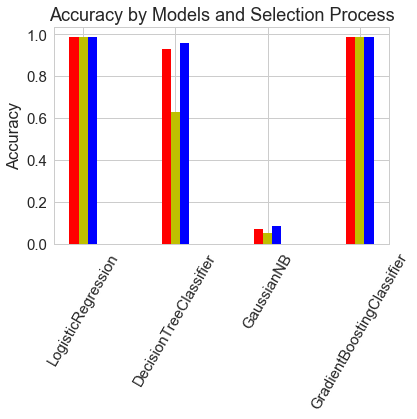

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind =  np.arange(4)   # the x locations for the groups
width = 0.1     # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Out_Accuracy_1, width, color='r')
rects2 = ax.bar(ind + width, Out_Accuracy_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Out_Accuracy_3, width, color='b')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=60)
plt.show()

Runtime of the models:

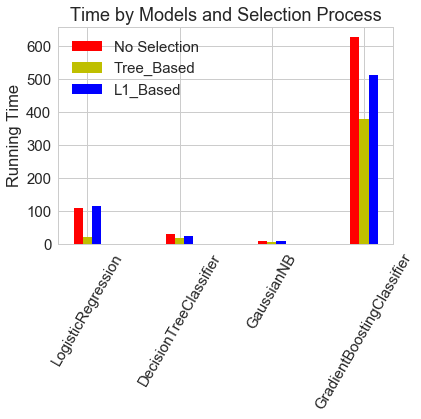

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind =  np.arange(4)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Time_1, width, color='r')
rects2 = ax.bar(ind + width, Time_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Time_3, width, color='b')
ax.set_ylabel('Running Time')
ax.set_title('Time by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=60)
ax.legend((rects1[0], rects2[0],rects3[0]), ('No Selection', 'Tree_Based','L1_Based'))
plt.show()